---
<h1 align=center><strong><em>Classer ses iris (KNN)</em></strong></h1>

---

<center><img src="image.png" width="300" height="200"></center>

<h3><b><i> Dans ce brief nous allons réaliser une analyse exploratoire et un model de classification sur un dataset d'iris.</i></b></h3>

<h2><strong><b><i><u> 1: Mise en place de l'environnement et chargement du dataset</u></i></b></strong></h2>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_context("talk")
sns.set_style("darkgrid")
import numpy as np

data =pd.read_csv("iris.csv")
data.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


<h2><strong><i><u>2: Analyse exploratoire</u></i></strong></h2>

In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal.length  150 non-null    float64
 1   sepal.width   150 non-null    float64
 2   petal.length  150 non-null    float64
 3   petal.width   150 non-null    float64
 4   variety       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


<h4><strong><i>Le dataset des iris contient 150 fleurs avec chacune 4 caractéristiques : 
<ul>
<li> Longueur et largeur du sepal</li>
<li> Longueur et largeur des pétales</li>
</ul>
Il n'y a aucune valeur nulle dans ce dataset
</strong></i></h4>

In [3]:
data["variety"].describe()

count        150
unique         3
top       Setosa
freq          50
Name: variety, dtype: object

In [4]:
data["variety"].value_counts()

Setosa        50
Versicolor    50
Virginica     50
Name: variety, dtype: int64

<h4><strong><i>Nous avons 3 variétés de fleurs répartie de manière homogéne en 50 exemples chacune.</i></strong></h4>

In [5]:
data.duplicated().sum()

1

<h4><strong><i>Il y a deux fleurs exactement identique mais je ne vais pas supprimer l'une ou l'autre car il est possible que sur 150 espèces il y ait 2 fleurs identiques.<br>
Le jeu de données étant propre nous allons visualiser les données pour en apprendre un peu plus:</strong></i></h4>

<h3><strong><i>a) les correlations entre les 4 caractéristiques des fleurs</i></strong></h3>

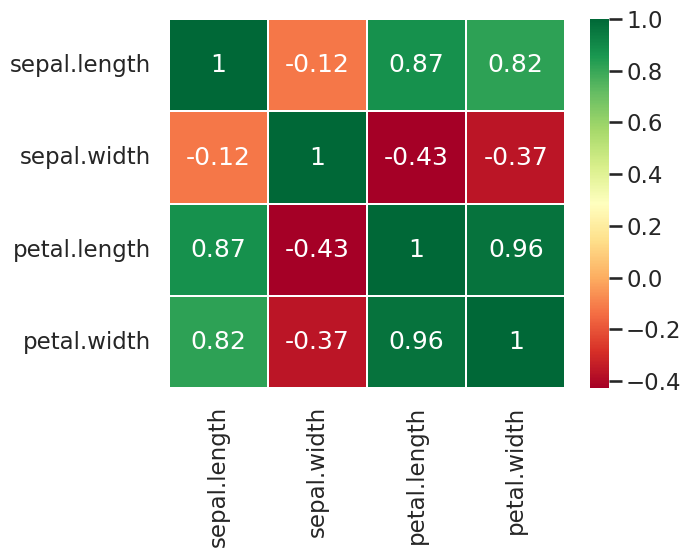

In [6]:
sns.heatmap(data.iloc[:,:-1].corr(),annot=True,cmap='RdYlGn',linewidths=0.2) #data.corr()-->correlation matrix
plt.show()

<h4><strong><i>Nous pouvons déja déduire qu'il y a une correlation assez forte entre toutes ces caractéristiques. Les correlations les moins importantes sont entre :
<ul>
<li>la longeur et la largeur du sepal</li>
<li>la largeur du sepal et la taille de la pétale</li>
</ul>
</strong></i></h4>

<h3><strong><i>b) Visualisation du rapport entre les 4 variables les plus corrélées</i></strong></h3>

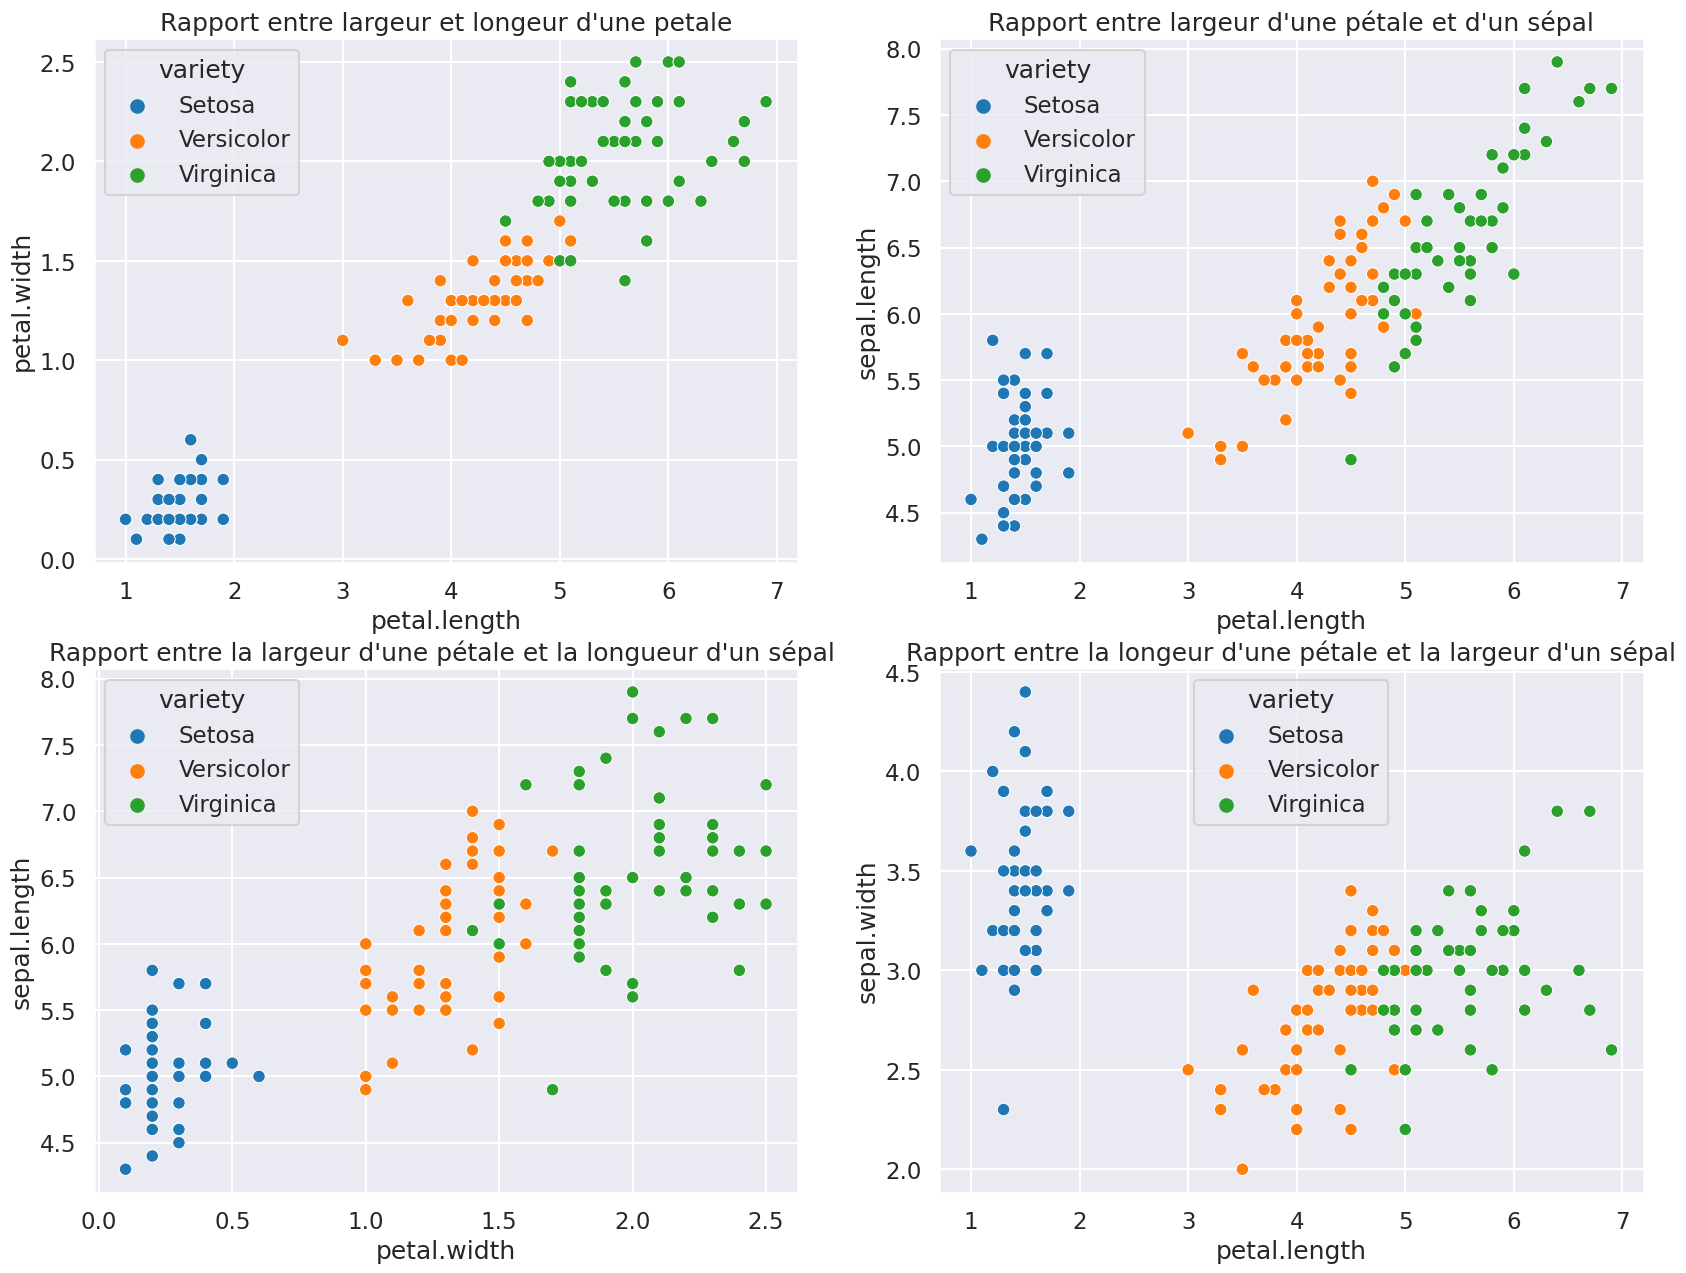

In [7]:
fig, ax = plt.subplots(2,2,figsize=(20,15))
sns.scatterplot(data=data,x="petal.length",y="petal.width",hue="variety",ax=ax[0,0])
ax[0,0].set_title("Rapport entre largeur et longeur d'une petale")

sns.scatterplot(data=data,x="petal.length",y="sepal.length",hue="variety",ax=ax[0,1])
ax[0,1].set_title("Rapport entre largeur d'une pétale et d'un sépal")

sns.scatterplot(data=data,x="petal.width",y="sepal.length",hue="variety",ax=ax[1,0])
ax[1,0].set_title("Rapport entre la largeur d'une pétale et la longueur d'un sépal ")

sns.scatterplot(data=data,x="petal.length",y="sepal.width",hue="variety",ax=ax[1,1])
ax[1,1].set_title("Rapport entre la longeur d'une pétale et la largeur d'un sépal")

plt.show()

<h4><i>Nous pouvons apercevoir que les variétés sont bien différentes. La variété Setosa est la plus petite, la virginica la plus grande et que la versicolor se trouve au milieu en terme de taille.<br><br>
Nous pouvons également déduire que nous pouvons utiliser le model de <strong>classification K-nearest neighbors</strong> pour déterminer de quelle variété fait partie notre fleur en donnant à notre model les carastiques d'une fleur.<br><br>
Il serait possible d'obtenir des caractéristiques manquant ou de determiner la variété de la fleur en utilisant la <strong>regression Linéaire.
</strong></i></h4>

<h2><strong><i><u>3: model de classification</u></i></strong></h2>

<h3><strong><i>a) Transformation du dataset </i></strong></h3>

In [8]:
from sklearn import preprocessing as pp
data["variety_label"]=pp.LabelEncoder().fit_transform(data["variety"])
data["variety_label"].value_counts()

0    50
1    50
2    50
Name: variety_label, dtype: int64

<h3><strong><i>b) Split du jeu de données  </i></strong></h3>

In [9]:
from sklearn.model_selection import train_test_split

Xtr, Xte, ytr, yte= train_test_split(data.iloc[:,:-2], data.variety_label , test_size=0.33, random_state=42)

<h3><strong><i>c) Recherche de la meilleure mise à l'echelle et du meilleur argument pour KNN sur le jeu d'entrainement  </i></strong></h3>

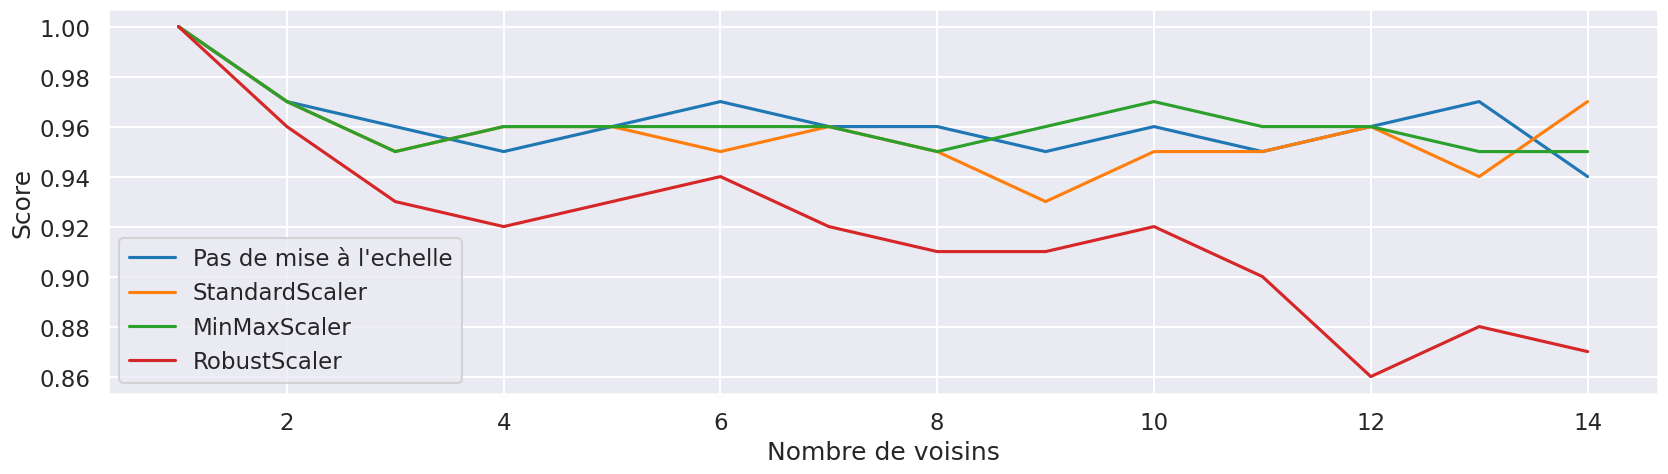

Sur le jeu d'entrainement la meilleure mise à l'echelle est StandardScaler() avec un nombre de KNN à 1 pour un score de 1.0


In [10]:
from sklearn.neighbors import KNeighborsClassifier

best_score,graph_x,graph_no_mise_echelle, graph_stand, graph_minmax, graph_robust=0,[i for i in range(1,15)],[],[],[],[]

neighbors=15
# Sans mise à l'echelle
for k in range(1,neighbors):
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(Xtr,ytr)
    result = model.score(Xtr,ytr)
    graph_no_mise_echelle.append(result)

# Avece mise à l'echelle
scaler_liste= [pp.StandardScaler(),pp.MinMaxScaler(),pp.RobustScaler()]

for i in scaler_liste:
    for k in range(1,neighbors):
        scaler = i.fit_transform(Xtr)
        model = KNeighborsClassifier(n_neighbors=k)
        model.fit(scaler,ytr)
        result = model.score(scaler,ytr)
        if str(i)==str(pp.StandardScaler()):
            graph_stand.append(result)
        elif str(i)==str(pp.MinMaxScaler()):
            graph_minmax.append(result)
        else:
            graph_robust.append(result)
        

        if result>best_score:
            best_score=result
            best_k=k
            echelle= i

plt.figure(figsize=(20,5))
plt.plot(graph_x,graph_no_mise_echelle,label="Pas de mise à l'echelle")
plt.plot(graph_x,graph_stand,label="StandardScaler")
plt.plot(graph_x,graph_minmax,label="MinMaxScaler")
plt.plot(graph_x,graph_robust,label="RobustScaler")
plt.xlabel('Nombre de voisins')
plt.ylabel('Score')
plt.legend()
plt.show()

print("Sur le jeu d'entrainement la meilleure mise à l'echelle est",echelle,"avec un nombre de KNN à",best_k,"pour un score de",best_score)
        
    
    

<h4><i>La phrase automatique ci-dessus pour trouver la meilleure mise à l'echelle ainsi que le nombre de voisin optimum pour le model KNN n'a pas de sens puisque la meilleure performance est obtenue avec un nombre de voisins égal à 1 et ce quelque soit la mise à l'echelle.</i></h4>

<h3><strong><i>d) Essai sur le jeu de test avec les paramètres trouvé precedemment</i></strong></h3>

In [11]:
# Utilisation des variables précedente pour l'echelle et le nombre de voisins (echelle,best_k) 
scaler = echelle.fit_transform(Xte)
model = KNeighborsClassifier(n_neighbors=best_k)
model.fit(scaler,yte)
model.score(scaler,yte)

1.0

<h3><strong><i>e) Conclusion</i></strong></h3>
<h4>Le model fonctionne à la prefection car il ne fait aucune erreur !!! Cette performance est visible aussi avec la matrice de confusion ainsi que l'accuaracy score :</h4>

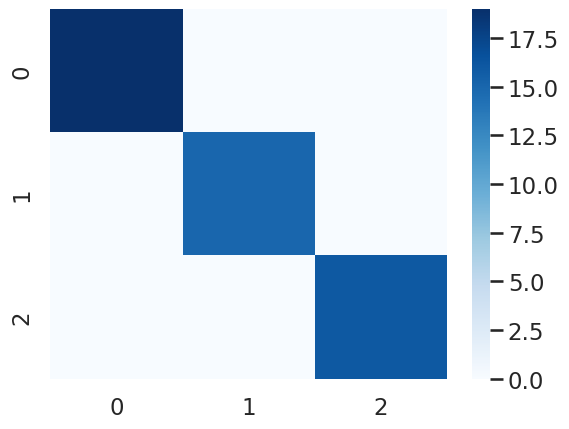

L'accuaracy score est de 1.0


In [12]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

sns.heatmap(data=confusion_matrix(yte,model.predict(scaler)), cmap="Blues") 
plt.show()
print("L'accuaracy score est de",accuracy_score(yte, model.predict(scaler)))